# Tool Box :::: # 
## Importing ::#

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
def load_img_gray():
    img=cv.imread('little.jpg',0)
    return img

def load_img_gray_f32():
    img=cv.imread('little.jpg',0)
    img=cv.cvtColor(img,cv.COLOR_GRAY2BGR).astype(np.float32)/255
    return img

def load_img_color():
    img=cv.imread('little.jpg')
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return img

def display_img(img, cmap='None'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img)



# FUNCTIONS: #

In [7]:
def original_i(img):
    img=load_img_color()
    display_img(img)
#######BLURING########
#IMG GRAY OR COLOR

#Bluring filters:::::
def bluring_filter(img):
    
    imgbr=load_img_color()
    br=cv.blur(imgbr,ksize=(7,7))
    display_img(br)

def Gaussian_filter(img):
    imggu=load_img_color()
    brr=cv.GaussianBlur(imggu,(5,5),40)
    display_img(brr)

# median bluring:::::
def median_filter(img):
    imgm=load_img_color()
    brm=cv.medianBlur(imgm,5)
    display_img(brm)
########BRIGHTNESS########
#GRAY OR COLOR
#LOG CORRECTION
#Gamma correction:::::
def gamma_25(img):
    imggm=load_img_gray_f32()
    result1=np.power(imggm,0.25)
    display_img(result1,cmap='gray')
    
def gamma_22(img):
    imggm1=load_img_gray_f32()
    result2=np.power(imggm1,2.2)
    display_img(result2,cmap='gray')

######SHARPINING#########
#GRAY OR COLOR
def sobel_x(img):
    img=load_img_color()
    sobel=cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
    display_img(sobel)
    

def sobel_y(img):
    img=load_img_color()
    sobel=cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
    display_img(sobel)
    
def add_2_sobel(img):
    img=load_img_color()
    sobelx=cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
    sobely=cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
    blended=cv.addWeighted(sobelx,0.5,sobely,0.5,0)
    display_img(blended)



######## HISTOGRAM ####
# SHOW BLUE HIST IMG (THREE CHANNELES)
def hist_3(img):
    img_h=load_img_color()
    color=('b','g','r')
    for i, clr in enumerate(color):
        histr=cv.calcHist([img_h],[i],None,[256],[0,256])
        plt.plot(histr,color=clr)
        plt.xlim([0,256])

##### HIS EQ #####
# SHOW HISTOGRAM EQ & HIST FOR HISTOGRAM EQ IN GRAY SCALE:
def display(img,cmap=None):
    img=load_img_gray()
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img)
def histogram_eq(img):
    img_heq=load_img_color()
    hist_val_img=cv.calcHist([img_heq],[0],None,[256],[0,256])
    plt.plot(hist_val_img)
def eq_img(img):
    img_eq=cv.imread('C:\\Users\\HP\\CVPython\\data\\little.jpg',0)
    eq_image=cv.equalizeHist(img_eq)
    display(img,cmap='gray')
    

#SHOW HISTOGRAM EQ IN COLOR (HSV) SCALE 
#IN HSV SCALE (WE TRANS BGR TO HSV TO MAKE HISTEQ)
def hist_color_eq(img):
    img_final=load_img_color()
    show_img=cv.cvtColor(img_final,cv.COLOR_BGR2RGB)
    hsv=cv.cvtColor(img_final,cv.COLOR_BGR2HSV)
    hsv[:,:,2]=cv.equalizeHist(hsv[:,:,2])
    eq_color_img=cv.cvtColor(hsv,cv.COLOR_HSV2RGB)
    display_img(eq_color_img)
    
######## THRESHOLDING########
#IMG IN GRAY SCALE FIRST
def thresh_img(img):
    img1=load_img_gray()
    ret,th1=cv.threshold(img1,122,255,cv.THRESH_BINARY_INV)
    plt.imshow(th1,cmap='gray')

#daptive threshold
def adpt_thresh(img):
    img2=load_img_gray()
    th2=cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,8)
    plt.imshow(th2,cmap='gray')
    
def bended_thresh(img):
    img3=load_img_gray()
    ret,th1=cv.threshold(img3,122,255,cv.THRESH_BINARY_INV)
    th2=cv.adaptiveThreshold(img3,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,8)
    blended=cv.addWeighted(th1,0.2,th2,0.8,0)
    plt.imshow(blended,cmap='gray')


#ROTATE::::
def rotate_90(img):
    imgr=load_img_color()
    imgrg=load_img_gray()
    (h, w) = imgrg.shape
    # calculate the center of the image
    center = (w / 2, h / 2)
    angle90 = 90
    scale = 1.0
    # Perform the counter clockwise rotation holding at the center
    # 90 degrees
    M = cv.getRotationMatrix2D(center, angle90, scale)
    rotated90 = cv.warpAffine(imgr, M, (h, w))
    display_img(rotated90)

def rotate_180(img):
    imgr=load_img_color()
    imgrg=load_img_gray()
    (h, w) = imgrg.shape
    # calculate the center of the image
    center = (w / 2, h / 2)
    angle90 = 180
    scale = 1.0
    # Perform the counter clockwise rotation holding at the center
    # 90 degrees
    M = cv.getRotationMatrix2D(center, angle90, scale)
    rotated180 = cv.warpAffine(imgr, M, (h, w))
    display_img(rotated180)

def rotate_270(img):
    imgr=load_img_color()
    imgrg=load_img_gray()
    (h, w) = imgrg.shape
    # calculate the center of the image
    center = (w / 2, h / 2)
    angle90 = 270
    scale = 1.0
    # Perform the counter clockwise rotation holding at the center
    # 90 degrees
    M = cv.getRotationMatrix2D(center, angle90, scale)
    rotated270 = cv.warpAffine(imgr, M, (h, w))
    display_img(rotated270)
#FLIP 
def flip_i(img):
    imgr=load_img_color()
    imgf=cv.flip(imgr,0)
    display_img(imgf)
    
#NEGATIVE:::
def neg_i(img):
    imgn=load_img_color()
    img_not = cv.bitwise_not(imgn)
    display_img(img_not)

def f_t(img):
    img=load_img_gray()
    f= np.fft.fft2(img)
    fshift=np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    plt.subplot(121),plt.imshow(img,cmap='gray')
    plt.title('ip img'),plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
    plt.title('spectrum'),plt.xticks([]),plt.yticks([])
    plt.show()

# END OF CODE #

# Button code::: # 

GridspecLayout(children=(Button(button_style='warning', description='Rotation 270', layout=Layout(grid_area='w…

GridspecLayout(children=(Button(button_style='success', description='Hist Eq color', layout=Layout(grid_area='…

GridspecLayout(children=(Button(button_style='warning', description='Bluring', layout=Layout(grid_area='widget…

GridspecLayout(children=(Button(button_style='success', description='Sobel_x', layout=Layout(grid_area='widget…

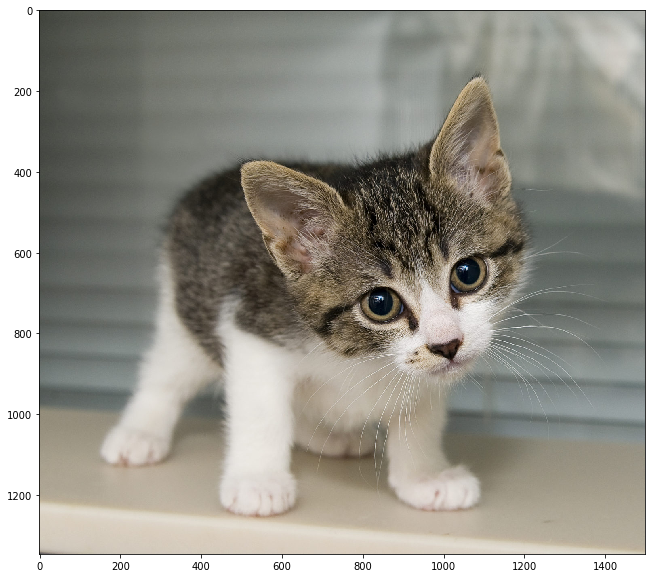

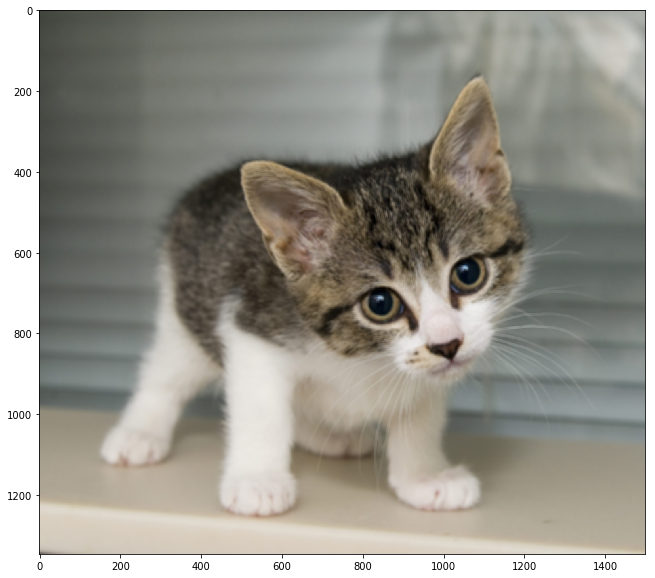

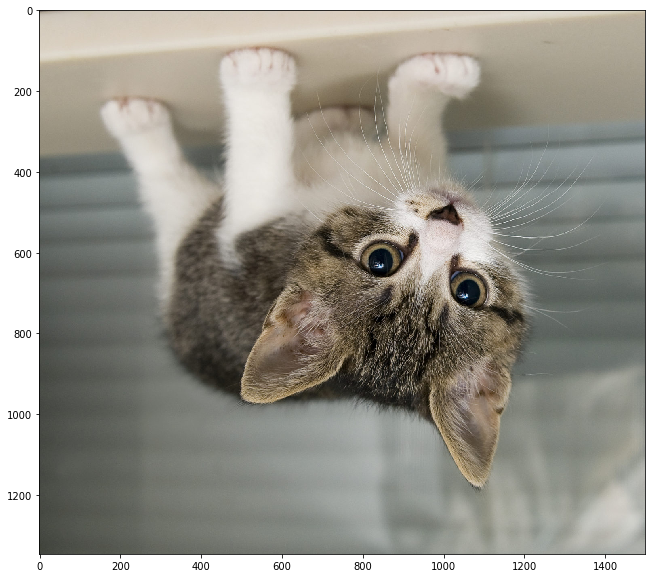

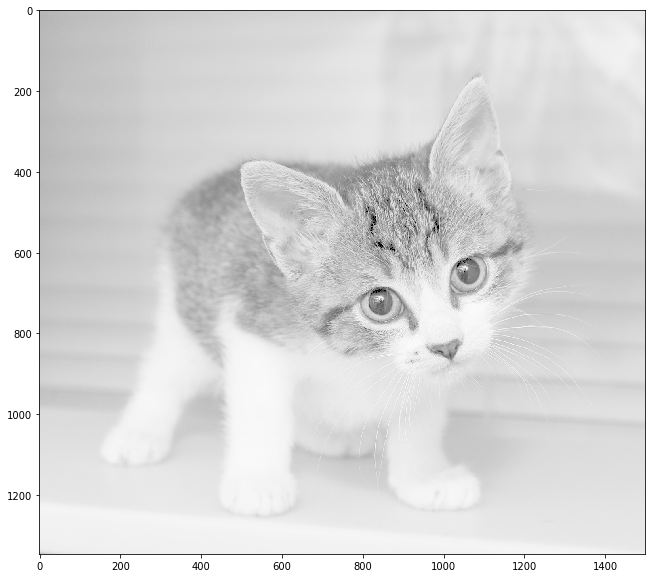

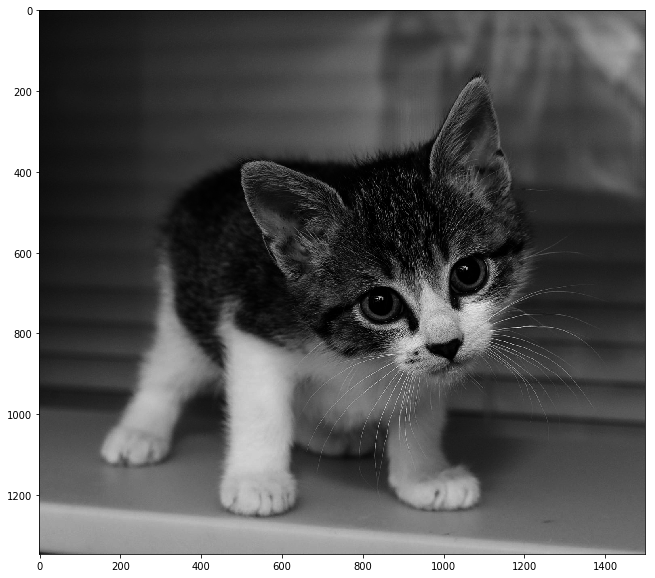

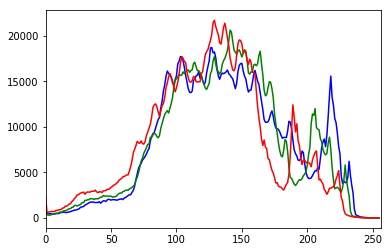

In [12]:
#BUTTONS FOR FUNCTIONS:::

import ipywidgets as ipw
from IPython.display import display
from ipywidgets import GridspecLayout
from ipywidgets import TwoByTwoLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
#----------------------------------------------------------------------------------
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

grid1= GridspecLayout(2, 3, height='160px')
grid1[0, 0] = create_expanded_button('Flip', 'info')
grid1[0, 1] = create_expanded_button('Rotation 90', 'warning')
grid1[0, 2] = create_expanded_button('Rotation 180', 'warning')

grid1[1, 0] = create_expanded_button('Rotation 270', 'warning')
grid1[1, 2] = create_expanded_button('Negative', 'danger')

#------------------------------------------------------------------------------
grid1[0, 0]=ipw.Button(
    description='Rotation 270',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[0,0].on_click(rotate_270)

grid1[0, 1]=ipw.Button(
        description='Rotation 90',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[0,1].on_click(rotate_90)

grid1[0, 2]=ipw.Button(
    description='Rotation 180',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[0,2].on_click(rotate_180)

grid1[1, 0]=ipw.Button(
    description='Flip',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,0].on_click(flip_i)

grid1[1, 1]=ipw.Button(
    description='Original Img',
    height='180px',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,1].on_click(original_i)

grid1[1, 2]=ipw.Button(
    description='Nigative',
    height='180px',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid1[1,2].on_click(neg_i)
       

#////////////////////////////////////////////////////////////////////////////////////////

grid = GridspecLayout(2, 3, height='160px')
grid[0, 0] = create_expanded_button('Hist EQ color', 'success')
grid[0, 1] = create_expanded_button('Hist graph 3 channels', 'success')
grid[0, 2] = create_expanded_button('Hist EQ gray scale', 'success')


#------------------------------------------------------------------------------
grid[0, 0]=ipw.Button(   
    description='Hist Eq color',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
   
)
grid[0,0].on_click(hist_color_eq)

grid[0, 1]=ipw.Button(
        description='Hist graph 3 channels',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid[0,1].on_click(hist_3)
 
grid[0, 2]=ipw.Button(
    description='Hist EQ gray scale',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
    
)
grid[0,2].on_click(histogram_eq)
#////////////////////////////////////////////////////////////////////////////////////////////////



grid2 = GridspecLayout(2, 3, height='160px')
grid2[0, 0] = create_expanded_button('Hist EQ color', 'success')
grid2[0, 1] = create_expanded_button('Hist graph 3 channels', 'success')
grid2[0, 2] = create_expanded_button('Hist EQ gray scale', 'success')


#------------------------------------------------------------------------------
grid2[0, 0]=ipw.Button(   
    description='Bluring',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
   
)
grid2[0,0].on_click(bluring_filter)

grid2[0, 1]=ipw.Button(
        description='Gaussian',
    disabled=False,
    button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid2[0,1].on_click(Gaussian_filter)
 
grid2[0, 2]=ipw.Button(
    description='Median filter',
    disabled=False,
    button_style='Warning', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
    
)
grid2[0,2].on_click(median_filter)


grid2[1, 0]=ipw.Button(
    description='Frequency Domain Analysis',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
    
)
grid2[1,0].on_click(f_t)

grid2[1, 1]=ipw.Button(
    description='Gamma 0.25',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
    
)
grid2[1,1].on_click(gamma_25)

grid2[1, 2]=ipw.Button(
    description='Gamma 2.2',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
    
)
grid2[1,2].on_click(gamma_22)

 
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////

grid3= GridspecLayout(2, 3, height='160px')
grid3[0, 0] = create_expanded_button('Flip', 'info')
grid3[0, 1] = create_expanded_button('Rotation 90', 'warning')
grid3[0, 2] = create_expanded_button('Rotation 180', 'warning')

grid3[1, 0] = create_expanded_button('Rotation 270', 'warning')
grid3[1, 1] = create_expanded_button('Zoom', 'success')
grid3[1, 2] = create_expanded_button('Negative', 'danger')

#------------------------------------------------------------------------------
grid3[0, 0]=ipw.Button(
    description='Sobel_x',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid3[0,0].on_click(sobel_x)

grid3[0, 1]=ipw.Button(
        description='Sobel_y',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid3[0,1].on_click(sobel_y)

grid3[0, 2]=ipw.Button(
    description='Blended_sobel',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid3[0,2].on_click(add_2_sobel)


grid3[1, 0]=ipw.Button(
    description='Thresholding',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)
grid3[1,0].on_click(thresh_img)

grid3[1, 1]=ipw.Button(
    description='Adabtive thresholding',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '120x'
        }
)
grid3[1,1].on_click(adpt_thresh)

grid3[1, 2]=ipw.Button(
    description='Adding two threshold',
    height='180px',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    layout = {
            'height': '60px',
            'width' : '160x'
        }
)

grid3[1,2].on_click(bended_thresh)

display(grid1,grid,grid2,grid3)
